### Task : Classification ( Gaussian Naive Bayes )
#### Input Features (Predictor Variables) : x0, x1, x2, x3
#### Output (Response Variable(s)) : Class (0 or 1)

### Importing the necessary modules

In [221]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes, metrics, model_selection, preprocessing, datasets, base

### Collecting, Analyzing and Visualizing the Data

In [11]:
data = datasets.make_classification(n_samples = 1000, n_features = 4, n_classes = 2)

X, y = data

In [17]:
# Converting data into a data frame (for analysis)

df = pd.DataFrame(X, columns = ['x' + str(i) for i in np.arange(X.shape[1])])
df['target'] = y
df.head()

,x0,x1,x2,x3,target
0,0.596925,-0.452760,0.865752,0.993597,1
1,0.205638,-0.541445,2.253800,0.399947,0
2,-0.992944,1.142182,-3.413808,-1.710974,0
3,-0.669570,0.127287,0.959591,-1.057592,0
4,-0.135858,0.032964,0.158495,-0.215656,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      1000 non-null   float64
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   float64
 4   target  1000 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 35.3 KB


In [20]:
# Checking for null values

any(np.sum(df.isna()))

False

In [21]:
df.describe()

,x0,x1,x2,x3,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.002070,0.001946,-0.014834,0.002919,0.50000
std,0.797072,0.453586,1.254711,1.293722,0.50025
min,-1.649204,-1.422734,-3.413808,-2.690643,0.00000
25%,-0.614553,-0.232144,-1.042878,-1.019929,0.00000
50%,-0.155340,-0.011032,0.346930,-0.217683,0.50000
75%,0.631859,0.290631,1.040441,1.016246,1.00000
max,2.336785,1.154090,2.329018,3.837336,1.00000


In [23]:
# Correlation Matrix (Pearson Correlation)

corr_matrix = df.iloc[:, :-1].corr()
corr_matrix

,x0,x1,x2,x3
x0,1.000000,-0.838301,0.014337,0.999591
x1,-0.838301,1.000000,-0.557170,-0.853547
x2,0.014337,-0.557170,1.000000,0.042920
x3,0.999591,-0.853547,0.042920,1.000000


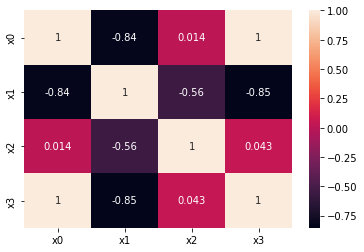

In [56]:
sns.heatmap(corr_matrix, annot = True)
plt.show()

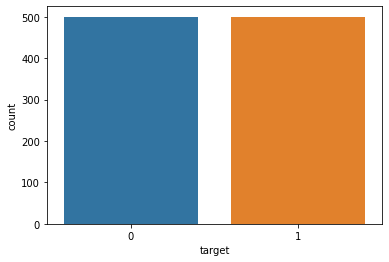

In [148]:
# Count Plot

sns.countplot(x = 'target', data = df)
plt.show()

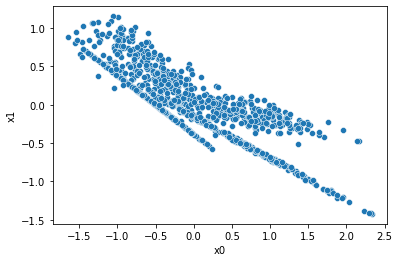

In [28]:
# Scatter Plot

sns.scatterplot(x = 'x0', y = 'x1', data = df)
plt.show()

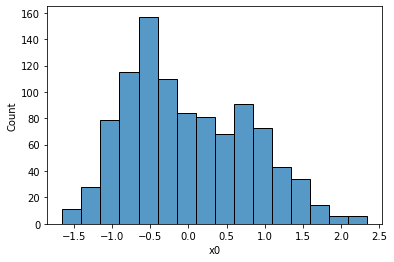

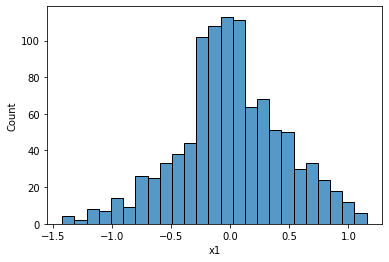

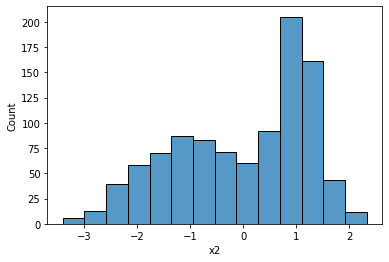

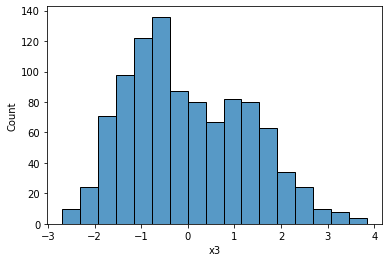

In [29]:
# Histogram

for attr in df.columns[:-1]:
    sns.histplot(x = attr, data = df)
    plt.show()

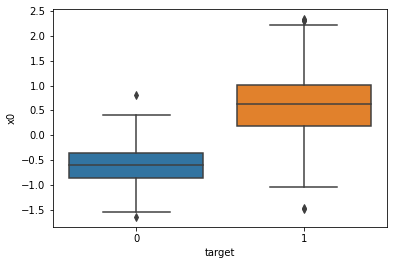

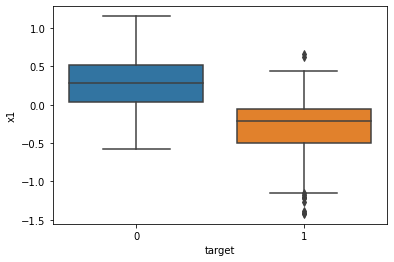

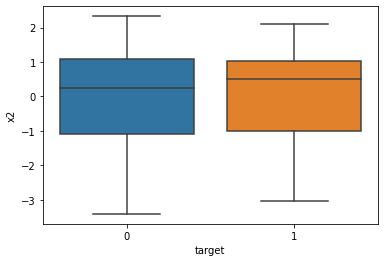

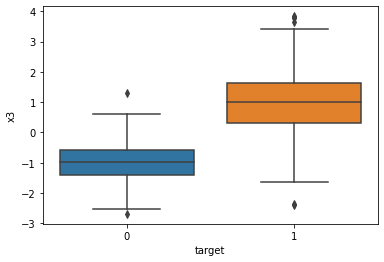

In [30]:
# Box Plot (reveals skewness)

for attr in df.columns[:-1]:
    sns.boxplot(x = df.columns[-1], y = attr, data = df)
    plt.show()

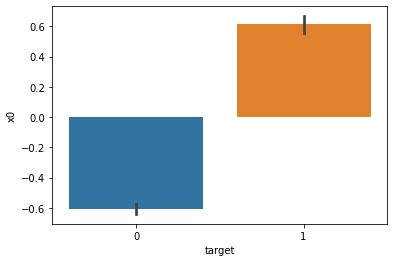

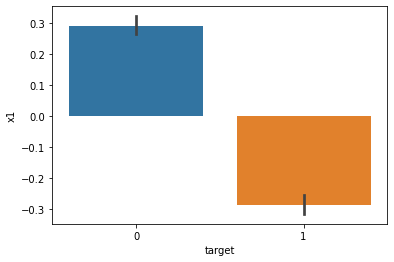

In [80]:
# Bar Chart

sns.barplot(x = 'target', y = 'x0', data = df)
plt.show()

sns.barplot(x = 'target', y = 'x1', data = df)
plt.show()

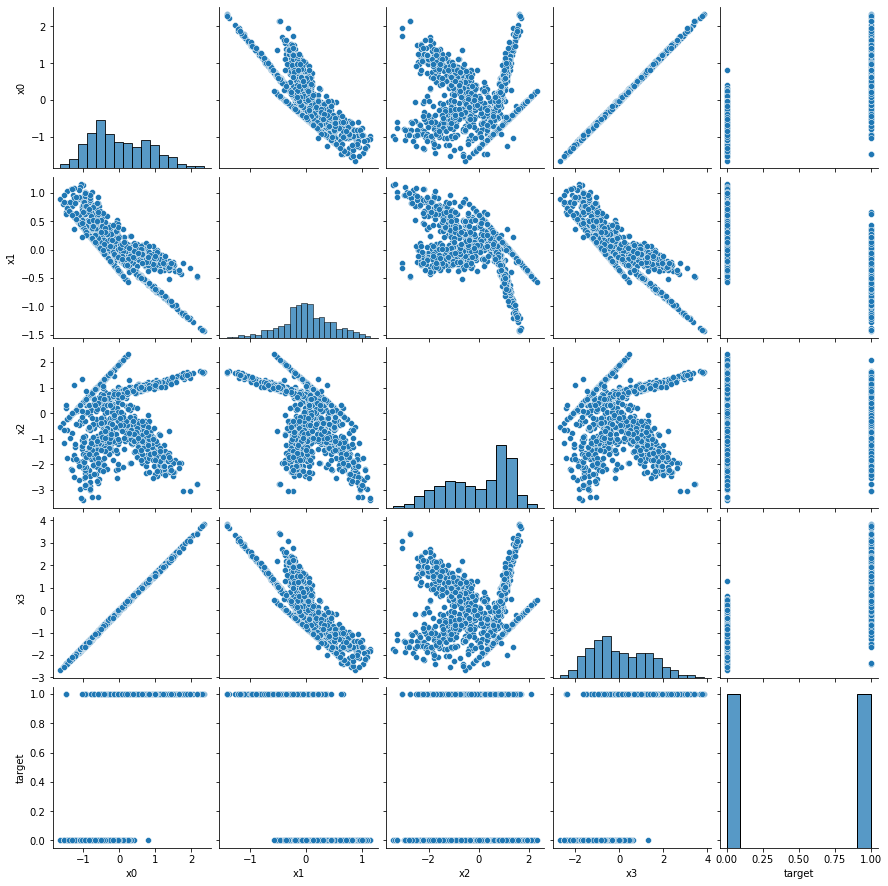

In [26]:
sns.pairplot(df)
plt.show()

### Data Preprocessing and Preperation

In [38]:
# Stratified Splitting

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 3)

for train_idx, test_idx in strat_split.split(X, y):
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

In [39]:
print(X_train.shape, X_test.shape)

(800, 4) (200, 4)


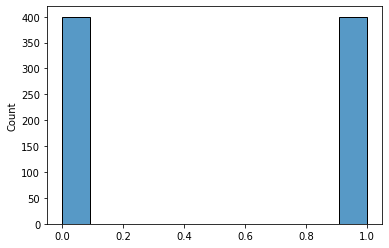

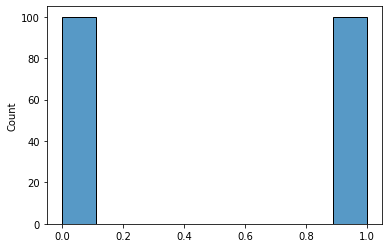

In [42]:
# Checking whether samples are distributed uniformely

sns.histplot(x = y_train)
plt.show()

sns.histplot(x = y_test)
plt.show()

### Training the Model and Evaluating it's Performance

In [173]:
X.mean(axis = 0)

array([ 0.00206968,  0.00194586, -0.01483385,  0.00291917])

In [180]:
X[:, 3].mean()

0.0029191746793058933

In [214]:
# Implementing Gaussian Naive Bayes from scratch 

class GaussianNB:
    
    def fit(self, X, y):
        n, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        self.means = np.zeros((n_classes, n_features))
        self.vars = np.zeros((n_classes, n_features))
        self.priors = np.zeros(n_classes)
        for idx, class_ in enumerate(self.classes):
            X_class = X[y == class_]
            self.means[idx, :] = X_class.mean(axis = 0)
            self.vars[idx, :] = X_class.var(axis = 0)
            self.priors[idx] = X_class.shape[0] / n
            
    def predict(self, X):
        y_pred = np.array([self.predict_(x) for x in X])
        return y_pred
    
    def predict_(self, x):
        posteriors = []
        
        for idx, class_ in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            posterior = prior + np.sum(np.log(self.pdf(idx, x)))
            posteriors.append(posterior)
            
        return self.classes[np.argmax(posteriors)]
    
    def pdf(self, idx, x):
        nr = np.exp(-((x - self.means[idx]) ** 2 / (2 * self.vars[idx])))
        dr = np.sqrt(2 * np.pi * self.vars[idx])
        return nr / dr
        
    def score(self, X, y):
        y_pred = self.predict(X)
        acc = np.sum(y == y_pred) / len(y)
        return acc

In [219]:
# Training the Classifier

clf = GaussianNB()

clf.fit(X_train, y_train)

In [216]:
y_train_pred = clf.predict(X_train)

acc = clf.score(X_train, y_train)
print("Accuracy :", acc)

Accuracy : 0.895


#### Sklearn Implementation

In [220]:
# Training the Classifier

model = naive_bayes.GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [218]:
y_train_pred = model.predict(X_train)

acc = model.score(X_train, y_train)
print("Accuracy :", acc)

Accuracy : 0.895


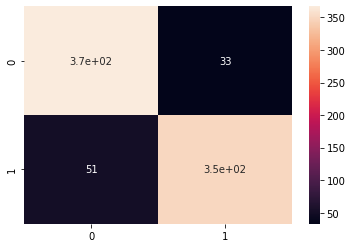

In [67]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [70]:
# Classification Metrics

tp = conf_matrix[1][1]
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print("Precision :", precision)
print("Recall (Sensitivity) :", recall)
print("F1 Score :", f1)

Precision : 0.9136125654450262
Recall (Sensitivity) : 0.8725
F1 Score : 0.8925831202046037


In [73]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       400
           1       0.91      0.87      0.89       400

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.89       800
weighted avg       0.90      0.90      0.89       800



### Validating the Model

In [64]:
y_test_pred = model.predict(X_test)

acc = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy :", acc)

Accuracy : 0.91


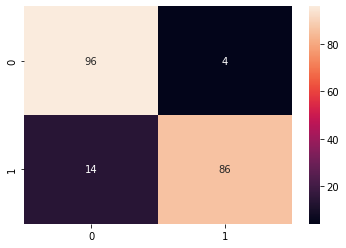

In [74]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [76]:
# Classification Metrics

tp = conf_matrix[1][1]
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print("Precision :", precision)
print("Recall (Sensitivity) :", recall)
print("F1 Score :", f1)

Precision : 0.9555555555555556
Recall (Sensitivity) : 0.86
F1 Score : 0.9052631578947369


In [77]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       400
           1       0.91      0.87      0.89       400

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.89       800
weighted avg       0.90      0.90      0.89       800



#### Cross Validation

In [222]:
scores = model_selection.cross_val_score(base.clone(model), X, y, cv = 10)

print(scores)
print(np.sum(scores) / len(scores))

[0.9  0.89 0.89 0.93 0.9  0.92 0.84 0.91 0.89 0.91]
0.898
